# Chapter 3: Classification using the MNIST dataset (digits)

In [22]:
#import dependencies
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

## Data Exploration

In [3]:
#fetch dataset from openml
mnist = fetch_openml('mnist_784', as_frame=False) #as_frame = false gives numpy arrays and not pandas dataset, numpy arrays better for image data

/Users/Cheks/opt/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Visualise dataset and target

In [4]:
#store the data and target attributes
X, y = mnist.data, mnist.target

#what does the input data look like?
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
#what does the target data look like?
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X.shape #70k rows, 784 columns
#70k images, each image has 28*28 = 784 pixels (features). Each feature is a number from 0 (white) to 255 (black) which represents colour intensity.

(70000, 784)

In [7]:
#define a function to visualise an input

def show_digit(input_data):
    image = input_data.reshape(28,28)

    #use imshow to show an image based on numpy array data. binary is greyscale (black/white)
    plt.imshow(image, cmap = "binary")

    #turn off axes
    plt.axis("off")


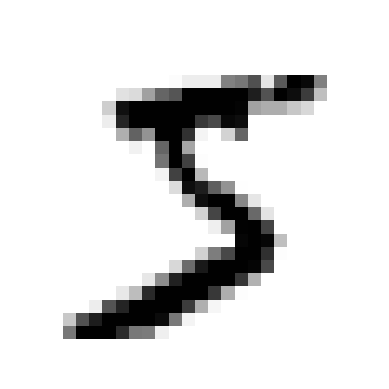

In [8]:
#visualise
some_input = X[0]
show_digit(some_input)

In [9]:
y[0] #digit is a 5

'5'

## Create a Good Test Set

The MNIST dataset returned by fetch_openml is already split into a training set of the first 60k images and a test set of the last 10k images, and is already shuffled. 

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In this subsection we aim to train a binary classifier that tells us if a digit is 5 or not 5.

In [11]:
#create target vectors
y_train_5 = (y_train == '5') #true for all instances where the target is 5, false otherwise
y_test_5 = (y_test == '5')

In [12]:
#pick a classifier and train it - here we use SGDClassifier. define and fit.
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5) #tells classifier if 5 or not a 5

SGDClassifier(random_state=42)

In [13]:
#predict
sgd_clf.predict([some_input]) #takes in an array. should be true since it was a 5

array([ True])

## Evaluating a Classifier

### Measuring Accuracy using Cross-Validation

In [14]:
#use the cross_val_score function and scoring='accuracy'
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
#95% accuracy! Is this a sign of a good classifier?

array([0.95035, 0.96035, 0.9604 ])

Check against a dummy classifier. This will simply assign every input to the most frequent class (non-5).

In [15]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
#any() prints true if any is true (a 5):
print(any(dummy_clf.predict(X_train))) #no 5s predicted

False


In [16]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')
#90% accuracy. this is because there weren't many 5s in the data in the first place so assigning them all to non-5 was a good strategy

array([0.90965, 0.90965, 0.90965])

### Using a Confusion Matrix

In [17]:
#cross_val_predict returns the predictions made on each test fold
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm 

array([[53892,   687],
       [ 1891,  3530]])

Rows are actual classes, columns are predicted classes. Non-5 images are considered first.

The first row considers actual non-5 images. Most (53892) were correctly identified as non-5 (*true negatives*), whereas the other 687 were incorrectly identified as non-5. These are *false positives* or *Type I errors*.

1891 images were predicted to be non-5 but were actually 5s. These are *false negative* or *Type II errors*. 3530 images were predicted to be 5s and were actually 5s (*true positives*).

**Precision and Recall**

In [19]:
precision_score(y_train_5, y_train_pred)
#when it claims to represent a 5, it is actually a 5 83.7% of the time.

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)
#when it is actually a 5, it only predicts a 5 65% of the time.

0.6511713705958311

In [23]:
#F1 score is a harmonic mean of precision and recall
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [25]:
#obtain decision scores from decision_function
y_scores = sgd_clf.decision_function([some_input])
y_scores

array([2164.22030239])